# Dubai Real Estate Forecasting and Evaluating Property Value Data Challenge

> The objective of this notebook is to explore the dataset available in the challenge proposed by the Ocean Protocol in order to understand the sale and rentals of Dubai Real Estate.


> Creator: Néstor Campos (https://www.linkedin.com/in/nescampos/)


> Date: 2023-05-17


> Challenge: https://desights.ai/challenge/8

## Extracting and opening the dataset


> A copy of the dataset was downloaded to make it easy to read at all times. This exploration uses Google Colab and Drive, but can be applied in any context with local files.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rents = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OCEAN/rents.csv', sep=';')
transactions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OCEAN/transactions.csv', sep=';')

<ipython-input-2-152a895ea973>:1: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  rents = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OCEAN/rents.csv', sep=';')
<ipython-input-2-152a895ea973>:2: DtypeWarning: Columns (14,15,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  transactions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OCEAN/transactions.csv', sep=';')


## Depuration

In this part, we cleanse the data with the appropriate data types. And I only process 10% of the rental data (due to available resources), but you can omit the next line if necessary.

In [3]:
rents = rents.sample(frac=0.1, random_state=42)

In [4]:
# We clean the Annual Amount columns
rents['Annual Amount'] = rents['Annual Amount'].str.replace(",", ".")

# Convert the column in numeric
rents['Annual Amount'] = pd.to_numeric(rents['Annual Amount'], errors='coerce')

transactions['Transaction Date'] = pd.to_datetime(transactions['Transaction Date'])
rents['Registration Date'] = pd.to_datetime(rents['Registration Date'])

In [5]:
rents['Property Size (sq.m)'] = pd.to_numeric(rents['Property Size (sq.m)'], errors='coerce')

# 1. what noteworthy insights can you draw?


Analysis of temporal trends:

Using the 'Transaction Date' column of the 'transactions' dataset, we can analyze time trends in the Dubai real estate market. We can visualize how transaction volumes have varied over time.
We can also perform a similar analysis using the 'Registration Date' and 'Start Date' columns from the 'rents' dataset to investigate rental trends over time.

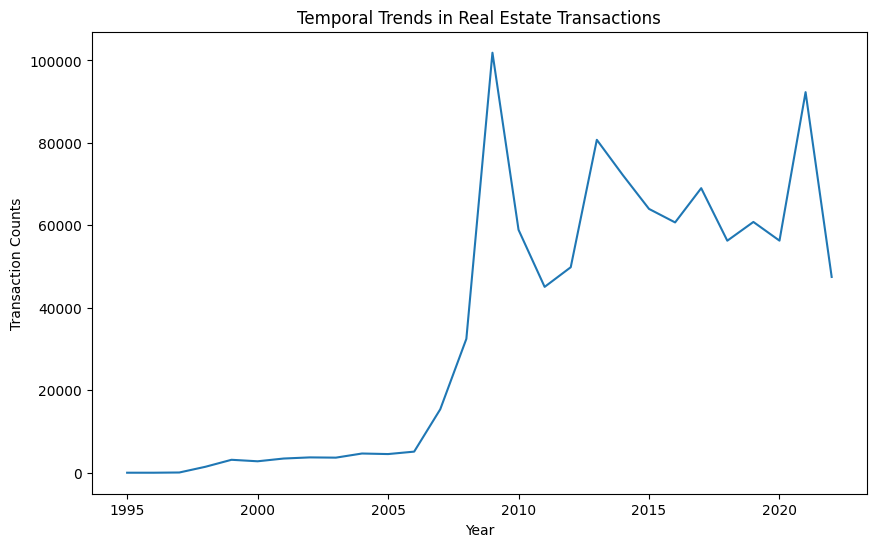

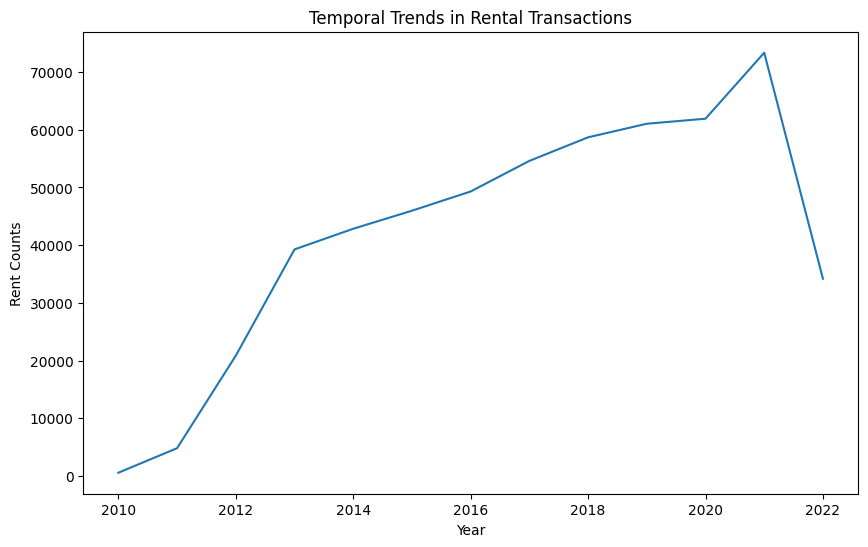

In [5]:

transaction_counts = transactions['Transaction Date'].dt.year.value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=transaction_counts.index, y=transaction_counts.values)
plt.xlabel('Year')
plt.ylabel('Transaction Counts')
plt.title('Temporal Trends in Real Estate Transactions')
plt.show()


rent_counts = rents['Registration Date'].dt.year.value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=rent_counts.index, y=rent_counts.values)
plt.xlabel('Year')
plt.ylabel('Rent Counts')
plt.title('Temporal Trends in Rental Transactions')
plt.show()

Feature Analysis:

We can examine the characteristics of the properties present in the data sets to identify which attributes have the greatest influence on the sale/rental prices in Dubai. Some relevant features may include 'Property Size (sq.m)', 'Usage' and 'Nearest Metro', among others.

We perform correlation analysis between these characteristics and prices using scatter plots and calculate correlation coefficients to determine the strength and direction of the relationships.

<ipython-input-6-9759889ded5f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = rents_subset.corr()


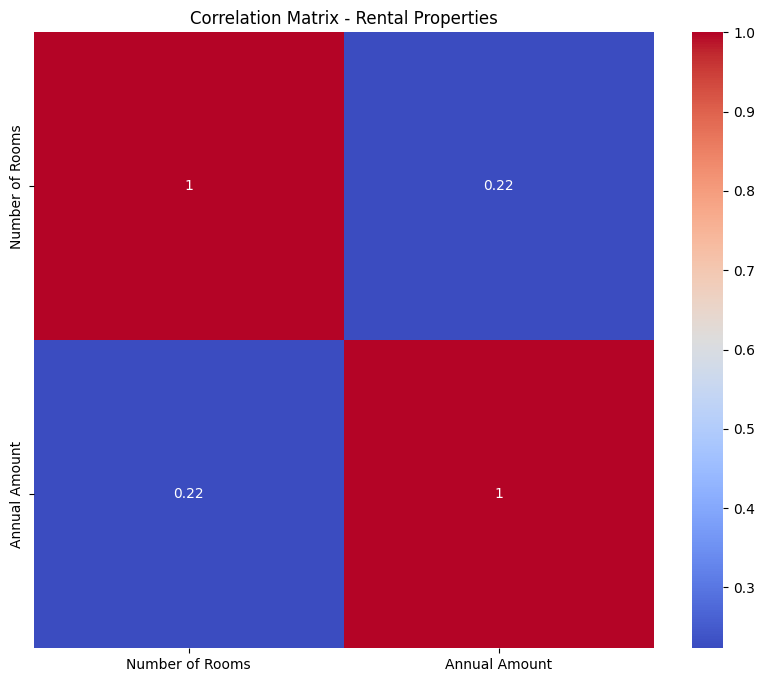

In [6]:
features = ['Property Size (sq.m)', 'Number of Rooms', 'Usage', 'Nearest Metro']
rents_subset = rents[features + ['Annual Amount']].copy()
rents_subset.dropna(inplace=True)
correlation_matrix = rents_subset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Rental Properties')
plt.show()

Transaction type analysis:

Finally, we can explore the different categories present in the 'Transaction Type' column of the 'transactions' dataset to identify the most common types of transactions in the Dubai real estate market.
From this data, we can obtain information about the preferences of buyers and sellers in terms of types of transactions, which can provide insights into market dynamics.

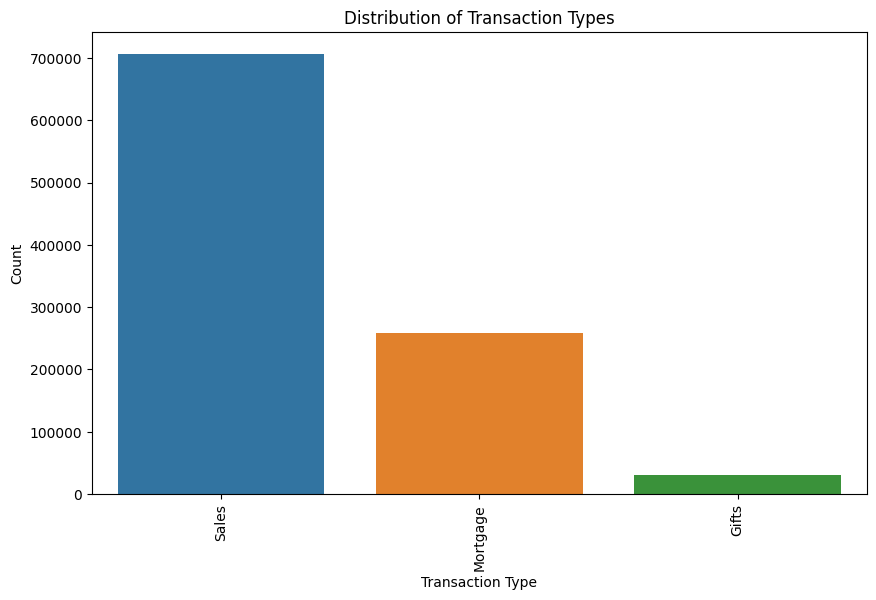

In [7]:
transaction_types = transactions['Transaction Type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=transaction_types.index, y=transaction_types.values)
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Distribution of Transaction Types')
plt.xticks(rotation=90)
plt.show()

# 2. Explore the correlation between the surface area in m² and the sale/rental price.

In the following code, I select the relevant columns, which are the property size ('Property Size (sq.m)') and the rental price ('Annual Amount') in the case of the 'rents' dataframe, and the size of the area ('Property Size (sq.m)') and the sale price ('Amount') in the case of the 'transactions' dataframe. Next, I remove the rows that contain missing values.

I then use the corr() method to calculate the correlation between the floor size and the rental price in the 'rents' dataframe and between the floor size and the sales price in the 'transactions' dataframe. Finally, I print the correlation value for each case.

In [6]:
rents_subset = rents[['Property Size (sq.m)', 'Annual Amount']].copy()
transactions_subset = transactions[transactions['Transaction Type'] == 'Sales'][['Property Size (sq.m)', 'Amount']].copy()

# Drop columns with na
rents_subset.dropna(inplace=True)
transactions_subset.dropna(inplace=True)

In [7]:
# Convert the column in numeric
rents_subset.dropna(subset=['Annual Amount'], inplace=True)
rents_subset.dropna(subset=['Property Size (sq.m)'], inplace=True)

In [8]:
rent_corr = rents_subset['Property Size (sq.m)'].corr(rents_subset['Annual Amount'])

sale_corr = transactions_subset['Property Size (sq.m)'].corr(transactions_subset['Amount'])

print("Correlation between Property Size (sq.m) and Rental Price: ", rent_corr)
print("Correlation between Property Size (sq.m) and Sale Price: ", sale_corr)

Correlation between Property Size (sq.m) and Rental Price:  -0.00027967460689029577
Correlation between Property Size (sq.m) and Sale Price:  0.04691843319950828


# 3. Compare and contrast the evolving trends of the rental and sales real estate markets in Dubai. Investigate any potential correlations or differences between these two markets and provide an explanation for any observed patterns.

Now, I calculate the rental count per year and the sales count per year using the date data. This provides us with information about how rental and sale transactions have evolved over time.

Then, I use the matplotlib library and seaborn to plot the temporary rental and sales trends. Line charts show transaction counts for each year, allowing you to visually compare trends for both markets.

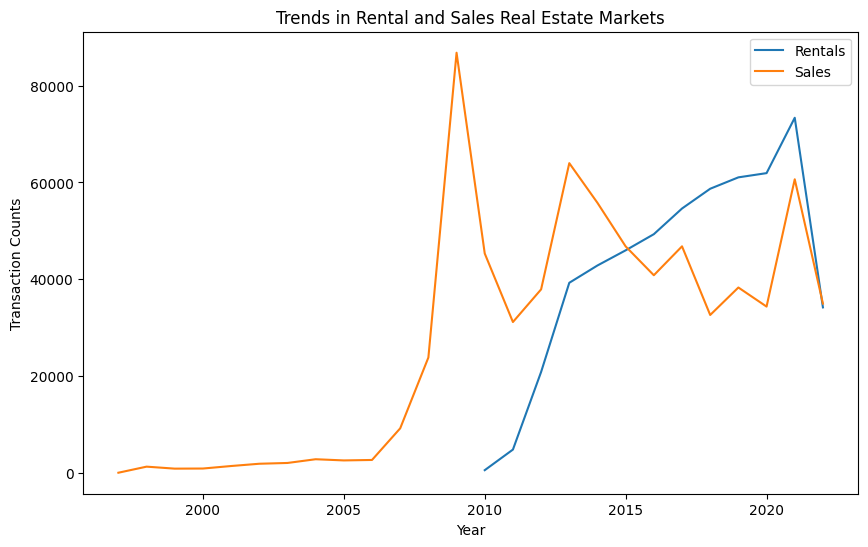

In [17]:
rent_counts = rents['Registration Date'].dt.year.value_counts().sort_index()

sale_counts = transactions[transactions['Transaction Type'] == 'Sales']['Transaction Date'].dt.year.value_counts().sort_index()

# Graficar las tendencias temporales de alquiler y venta
plt.figure(figsize=(10, 6))
sns.lineplot(x=rent_counts.index, y=rent_counts.values, label='Rentals')
sns.lineplot(x=sale_counts.index, y=sale_counts.values, label='Sales')
plt.xlabel('Year')
plt.ylabel('Transaction Counts')
plt.title('Trends in Rental and Sales Real Estate Markets')
plt.legend()
plt.show()

# 4. Identify and rank the factors that impact the sale/rental price of a property in Dubai, and analyze if these factors have changed over time. If so, identify the factors that have become increasingly significant and explain why.

I select the relevant columns that could impact rental and sale prices, such as 'Property Size (sq.m)', 'Number of Rooms', usage (' Usage') and the location of the nearest metro ('Nearest Metro'), together with the prices for rent ('Annual Amount') and sale ('Amount').

Next, I remove the rows that contain missing values in the dataframes.

Next, I calculate the correlation matrix for the selected factors and the rental and sale prices. The correlation matrices show how each factor is correlated with the respective prices.

Finally, the factors are ordered based on their correlation with rental and sale prices, and I print the resulting rankings.

By analyzing these rankings, I am able to identify the factors that have the highest correlation with rental and sale prices in Dubai.

In [19]:
rents_subset = rents[['Property Size (sq.m)', 'Number of Rooms', 'Usage', 'Nearest Metro', 'Annual Amount']].copy()
transactions_subset = transactions[transactions['Transaction Type'] == 'Sales'][['Property Size (sq.m)', 'Room(s)', 'Usage', 'Nearest Metro', 'Amount']].copy()

rents_subset.dropna(inplace=True)
transactions_subset.dropna(inplace=True)

In [20]:

rent_corr_matrix = rents_subset.corr()

sale_corr_matrix = transactions_subset.corr()

rent_corr_factors = rent_corr_matrix['Annual Amount'].sort_values(ascending=False)

sale_corr_factors = sale_corr_matrix['Amount'].sort_values(ascending=False)

print("Ranking of Factors Impacting Rental Prices:")
print(rent_corr_factors)

print("\nRanking of Factors Impacting Sale Prices:")
print(sale_corr_factors)

Ranking of Factors Impacting Rental Prices:
Annual Amount           1.000000
Number of Rooms         0.408135
Property Size (sq.m)   -0.023617
Name: Annual Amount, dtype: float64

Ranking of Factors Impacting Sale Prices:
Amount                  1.000000
Property Size (sq.m)    0.536488
Name: Amount, dtype: float64


<ipython-input-20-45a06ee00978>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rent_corr_matrix = rents_subset.corr()
<ipython-input-20-45a06ee00978>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sale_corr_matrix = transactions_subset.corr()


# Model 1: Develop a machine learning algorithm to estimate the appropriate market value of a property according to its attributes.

In the code I use the scikit-learn function train_test_split to split the data into training and test sets. Then I instantiate the linear regression model using LinearRegression and train the model on the training data.

After training the model, I make predictions on the test set using the predict. I calculate several evaluation metrics, such as mean absolute error (MAE), mean square error (MSE), and coefficient of determination (R²), to assess model performance.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [19]:
numerical_features = ["Property Size (sq.m)"]
categorical_features = ['Room(s)', 'Usage', 'Nearest Metro']
target = 'Amount'

In [20]:
transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)],
    remainder='passthrough')

In [24]:
transactions.dropna(subset=numerical_features + [target], inplace=True)

In [ ]:
transformed_data = transformer.fit_transform(transactions)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(transactions[features], transformed_data[target], test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Model 2: Build a machine learning algorithm to predict the correct rental price of a property according to its characteristics.

The process is similar to model 1, using the rents dataset.

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Seleccionar las columnas de características y el objetivo
categorical_features = ['Property Type', 'Usage']
numeric_features = ['Property Size (sq.m)']
target = 'Annual Amount'

# Crear un transformador de columnas para aplicar la codificación one-hot
transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)],
    remainder='passthrough')

# Crear un pipeline que incluya el transformador y el modelo ElasticNet
model = Pipeline(steps=[
    ('preprocessor', transformer),
    ('regressor', ElasticNet())])

# Dividir los datos en características y objetivo
rents[categorical_features+numeric_features+[target]].dropna(inplace=True)

X = rents[categorical_features+numeric_features+[target]].drop(target, axis=1)
y = rents[target]

# Entrenar el modelo
model.fit(X, y)

# Realizar predicciones
predictions = model.predict(X)